<a href="https://colab.research.google.com/github/Ansh12123/Ansh12123/blob/main/ML_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
file=files.upload()

Saving Real estate valuation data set.xlsx to Real estate valuation data set.xlsx


In [ ]:
import pandas as pd
import io

In [ ]:
dataset=pd.read_excel(io.BytesIO(file['Real estate valuation data set.xlsx']),sheet_name=0)

In [ ]:
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
dataset.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


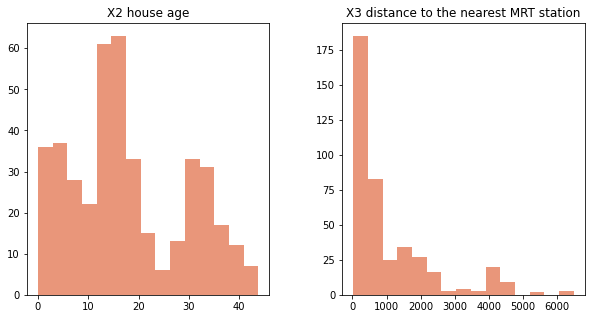

In [ ]:
figure = dataset[['X2 house age',
          'X3 distance to the nearest MRT station'
          ]].hist(bins=15,
                 color='darksalmon',
                 xlabelsize=10, ylabelsize=10,
                 figsize=(10,5),
                  histtype='barstacked',
                  grid=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

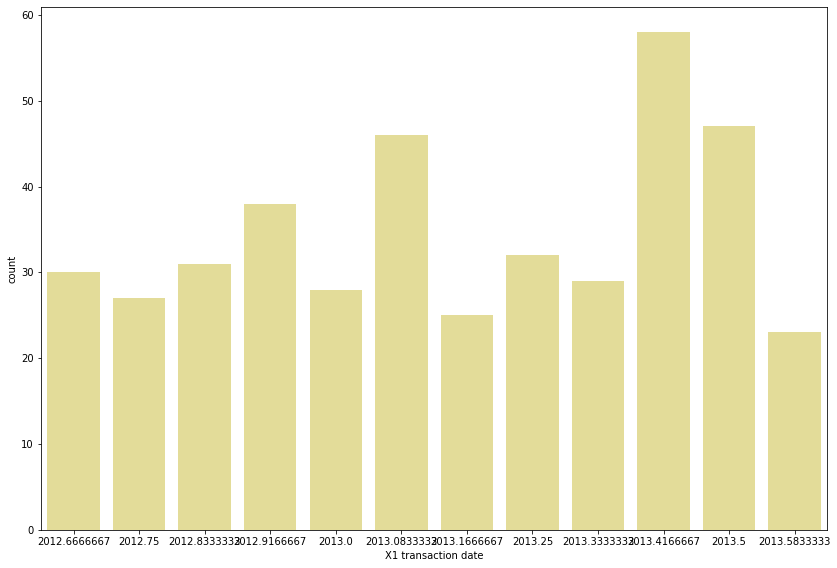

In [ ]:
import seaborn as sns
sns.countplot(x = 'X1 transaction date', data = dataset, color='Khaki')
plt.tight_layout(rect=(0, 0, 2, 2))

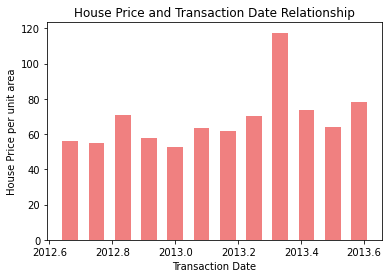

In [ ]:
x= dataset['X1 transaction date']
y=dataset['Y house price of unit area']
plt.bar(x,y, width=0.05, color='lightcoral')
plt.xlabel("Transaction Date")
plt.ylabel("House Price per unit area")
plt.title("House Price and Transaction Date Relationship")
plt.show()

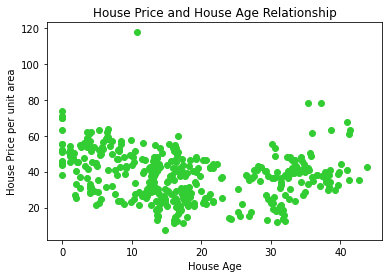

In [ ]:
x= dataset['X2 house age']
y=dataset['Y house price of unit area']
plt.scatter(x,y, color='limegreen')
plt.xlabel("House Age")
plt.ylabel("House Price per unit area")
plt.title("House Price and House Age Relationship")
plt.show()

Text(0.5, 1.0, 'Distance to the nearest MRT station and Price Relationship')

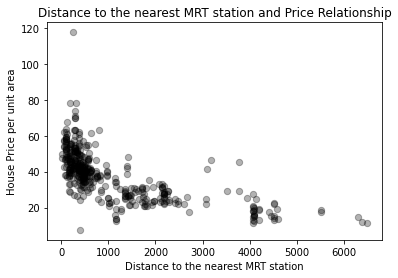

In [ ]:

x= dataset['X3 distance to the nearest MRT station']
y=dataset['Y house price of unit area']
plt.scatter(x, y, c='black', s=40, alpha=0.3)
plt.xlabel("Distance to the nearest MRT station")
plt.ylabel("House Price per unit area")
plt.title("Distance to the nearest MRT station and Price Relationship")

Text(0.5, 1.0, ' Number of convenience stores and Price Relationship')

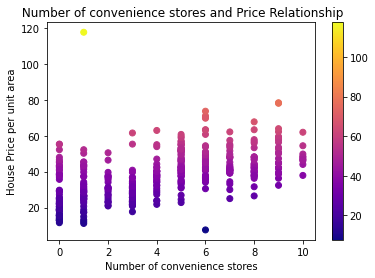

In [ ]:
x= dataset['X4 number of convenience stores']
y=dataset['Y house price of unit area']
plt.scatter(x, y, c=y, cmap='plasma')
plt.colorbar()
plt.xlabel("Number of convenience stores")
plt.ylabel("House Price per unit area")
plt.title(" Number of convenience stores and Price Relationship")

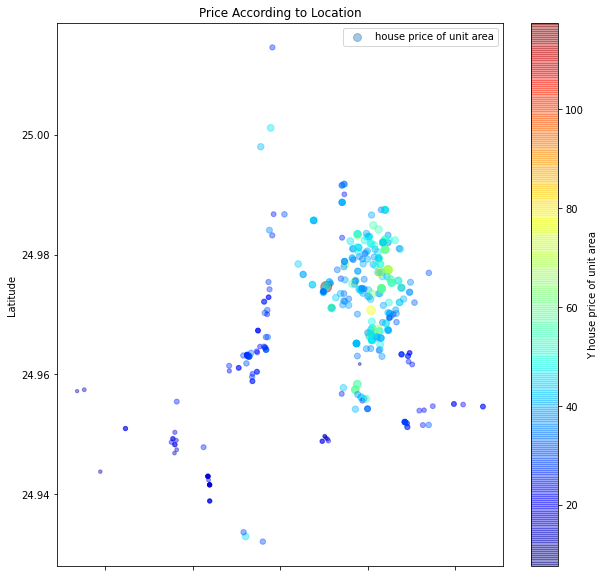

In [ ]:
dataset.plot(kind="scatter", x="X6 longitude", y="X5 latitude",
    s=dataset["Y house price of unit area"], label="house price of unit area",
    c='Y house price of unit area', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,10),
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Price According to Location")
plt.legend()
plt.show()

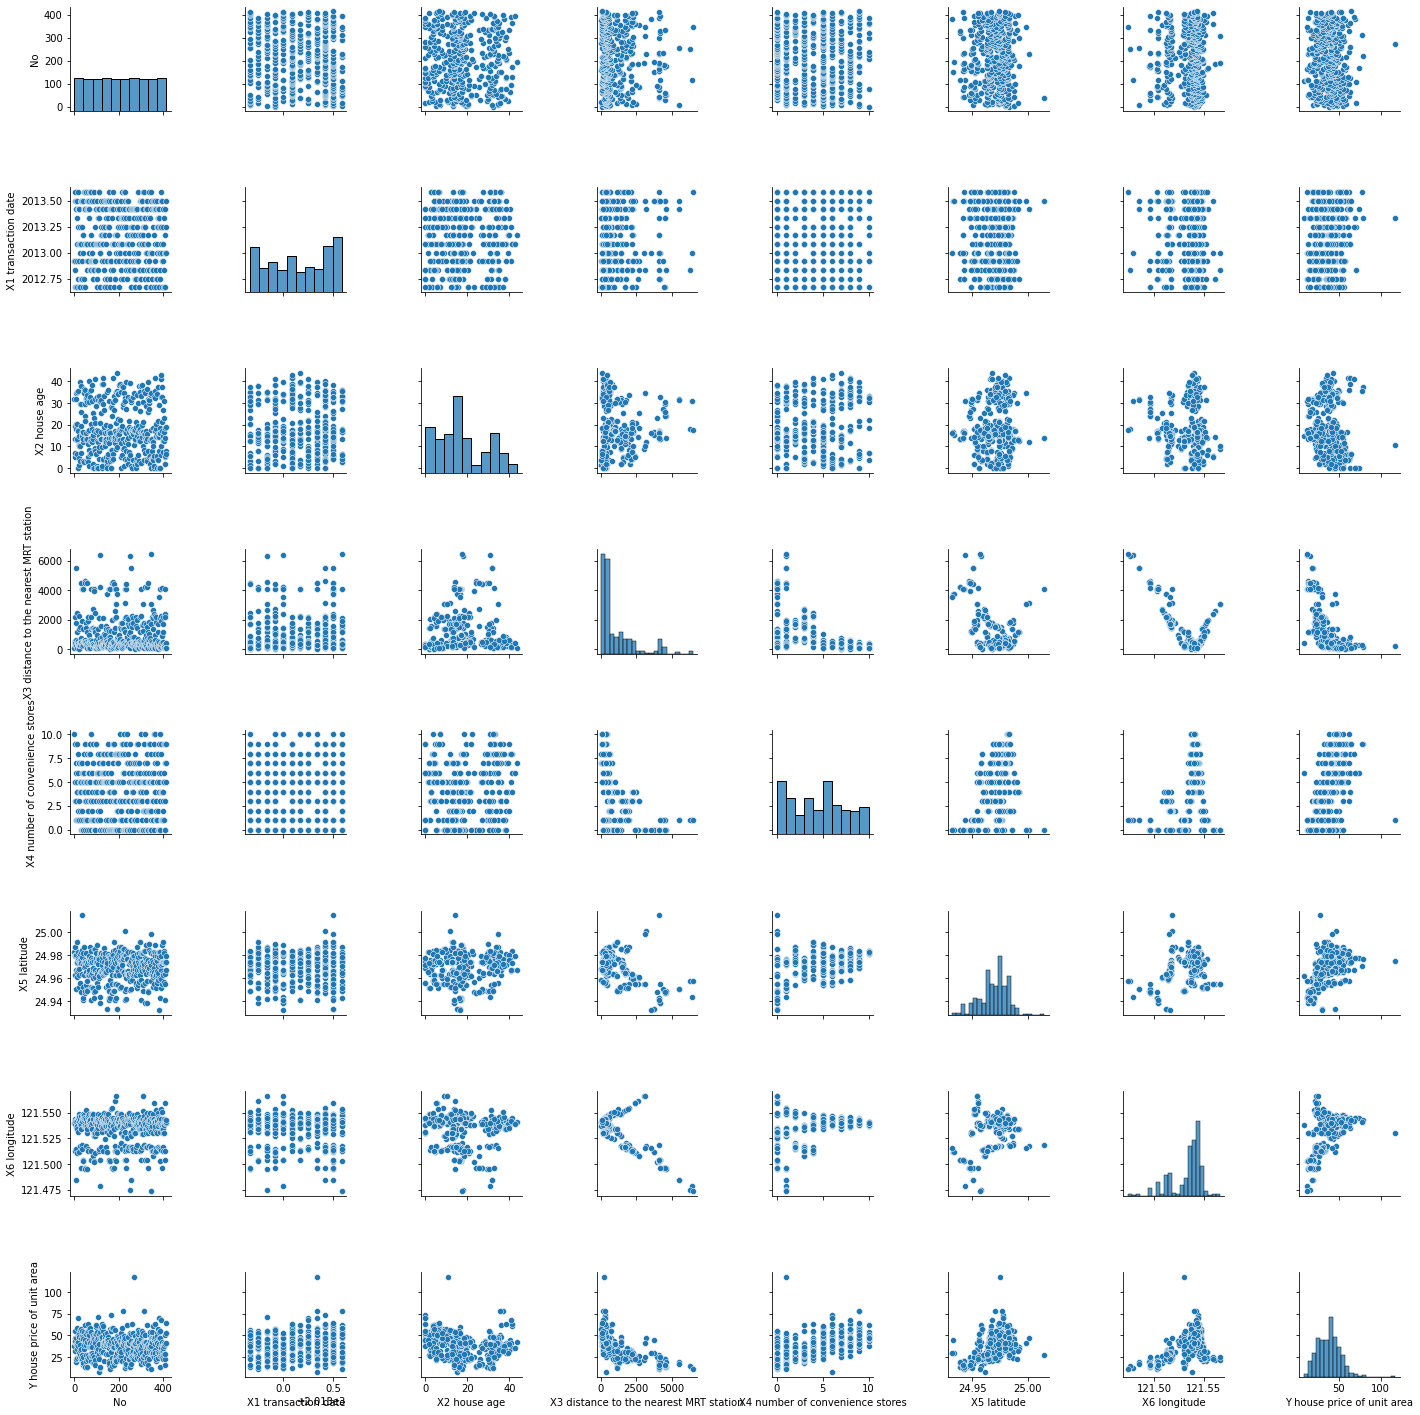

In [ ]:
sns.pairplot(dataset)

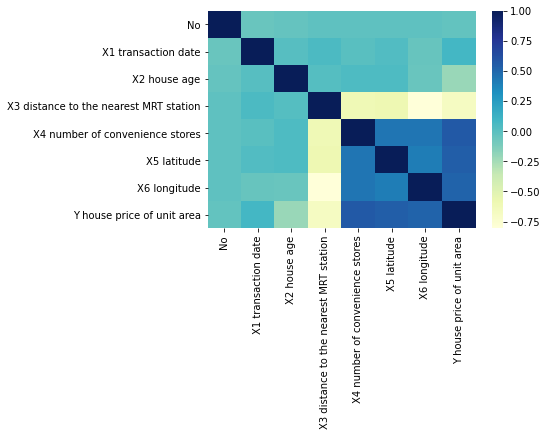

In [ ]:
corr = dataset.corr()
sns.heatmap(corr,
            cmap="YlGnBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
#Linear Regression Model
x=dataset[['X4 number of convenience stores']] 
y=dataset['Y house price of unit area']
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)
pred=reg.predict(x)
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(pred,y)
r2=r2_score(pred,y)
print('Test MSE=',mse)
print('Test R2_score=',r2)

Test MSE= 124.47199212769486
Test R2_score= -1.067046164229534


Intercept on y-axis = 27.181104781472424
slope = [2.63765346]
Equation of line=Y=M*x+C


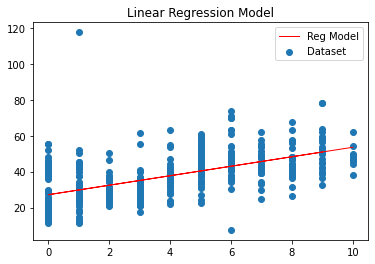

In [ ]:
#Plotting
import matplotlib.pyplot as plt
plt.scatter(x,y,label='Dataset')
plt.plot(x,pred,label='Reg Model',c='r',lw=1)
plt.title('Linear Regression Model')
plt.legend()
print('Intercept on y-axis =',reg.intercept_)
print('slope =',reg.coef_)
print('Equation of line=Y=M*x+C')

In [ ]:
#Multiple Linear Regression Model
a=dataset[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
b=dataset['Y house price of unit area']
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.7,random_state=0)
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(a_train,b_train)
print('Train MSE=',mean_squared_error(b_train,linreg.predict(a_train)))
print('Test MSE=',mean_squared_error(b_test,linreg.predict(a_test)))
print('Train R2=',r2_score(b_train,linreg.predict(a_train)))
print('Test R2=',r2_score(b_test,linreg.predict(a_test)))

Train MSE= 112.35927490408942
Test MSE= 76.1853713264257
Train R2= 0.4504667707821117
Test R2= 0.5662746770375183


In [ ]:
#MSE Comparison
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
i=LinearRegression()
j=Lasso() 
k=Ridge()
l=ElasticNet()
lr=[i,j,k,l]
lr_name=['linear','lasso','ridge','elastcinet']
mse={}
for model,model_name in zip(lr,lr_name):
  model.fit(x_train,y_train)
  ms=mean_squared_error(y_test,model.predict(x_test))
  mse[model_name]=ms
print(mse)


{'linear': 111.26285976009484, 'lasso': 112.59223052737407, 'ridge': 111.28456589025765, 'elastcinet': 113.39233782253191}


In [ ]:
#Non-Linear Regression Model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
lr1=DecisionTreeRegressor()
lr2=RandomForestRegressor()
lr3=SVR()
lr=[lr1,lr2,lr3]
lr_name=['DTR','RFR','SVR']
mse={}
for model,model_name in zip(lr,lr_name):
  model.fit(x_train,y_train)
  ms=mean_squared_error(y_test,model.predict(x_test))
  mse[model_name]=ms
print(mse)


{'DTR': 112.88028050330115, 'RFR': 113.72257524697685, 'SVR': 112.30108037065814}


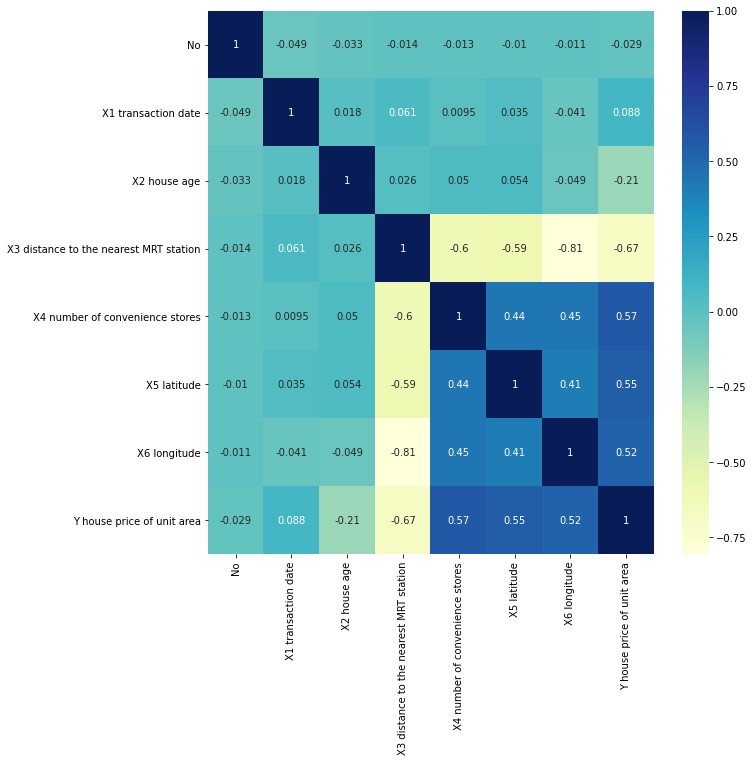

In [ ]:
#Correlation
cor=dataset.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cor,cmap="YlGnBu",annot=True)

Linear MSE 124.47199212769486
DTR MSE 114.11979294045521
RFR MSE 114.1439906913994
SVR MSE 119.74456818181447


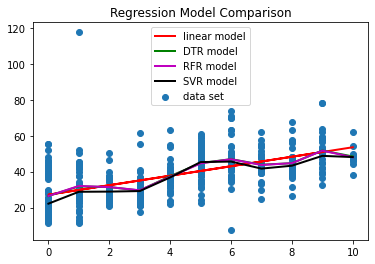

In [ ]:
#A simple linear regression model

import numpy as np
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)
pred_lin=reg.predict(x)
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
dtr=DecisionTreeRegressor(max_depth=5)
dtr.fit(x,y)
pred_dtr=dtr.predict(x)
rfr=RandomForestRegressor(max_depth=5)
rfr.fit(x,y)
pred_rfr=rfr.predict(x)
svr=SVR(C=100)
svr.fit(x,y)
pred_svr=svr.predict(x)
import matplotlib.pyplot as plt
plt.scatter(x,y,label='data set')
plt.plot(x,pred_lin,label='linear model',c='r',lw=2)
z=np.array(x)
id=z.flatten().argsort()
plt.plot(z[id],pred_dtr[id],label='DTR model',c='g',lw=2)
plt.plot(z[id],pred_rfr[id],label='RFR model',c='m',lw=2)
plt.plot(z[id],pred_svr[id],label='SVR model',c='k',lw=2)
plt.title('Regression Model Comparison')
plt.legend()
print('Linear MSE',mean_squared_error(y,pred_lin))
print('DTR MSE',mean_squared_error(y,pred_dtr))
print('RFR MSE',mean_squared_error(y,pred_rfr))
print('SVR MSE',mean_squared_error(y,pred_svr))